### 공공데이터 활용 
#### Case3. 2017 서울시 구별 CCTV 현황
http://www.data.go.kr/dataset/3074279/fileData.do;jsessionid=ZsuQWYKRZC8B4V1d9gQqzqzH.node20

- Datasets : data/public_seoul_cctv_2017.csv

#### 데이터분석 미션
- 과제1 : 서울시 구별 경찰서수와 CCTV설치수 조사
- 과제2 : 경찰서관할별 CCTV (설치대수) 조사
- 과제3 : 과제1,2를 하나의 그래프로 나타내보자.
- 과제4 : 경찰서수가 가장 많은구, CCTV가 가장 많이 설치된구를 파이차트로 나타내보자
- 과제5 : 모든 그래프를 1Page Report로 나타내보자

In [1]:
import platform

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:
    print("It's unknown system. Hangul fonts are not supported!")
    
# plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["figure.figsize"] = [12,6]

%matplotlib inline

In [2]:
df = pd.read_csv('./data/public_data/public_seoul_cctv_2017.csv', encoding='euc-kr')
df.tail(10)

,경찰서,개소,대수
22,구로,695,"1,691"
23,서초,344,"1,079"
24,양천,763,"2,234"
25,송파,675,779
26,노원,"1,288","1,416"
27,방배,236,830
28,은평,339,"1,058"
29,도봉,472,485
30,수서,677,"1,856"
31,총계,"16,603","33,523"


In [3]:
df.set_index('경찰서', inplace=True)           
df.tail()

,개소,대수
경찰서,,
방배,236,830
은평,339,"1,058"
도봉,472,485
수서,677,"1,856"
총계,"16,603","33,523"


In [5]:
df.index

Index(['중부', '종로', '남대문', '서대문', '혜화', '용산', '성북', '동대문', '마포', '영등포', '성동',
       '동작', '광진', '서부', '강북', '금천', '중랑', '강남', '관악', '강서', '강동', '종암', '구로',
       '서초', '양천', '송파', '노원', '방배', '은평', '도봉', '수서'],
      dtype='object', name='경찰서')

#### # 총계 행을 삭제 

In [4]:
df = df.drop(df.index[-1])
df.tail(10)

,개소,대수
경찰서,,
종암,295,767
구로,695,"1,691"
서초,344,"1,079"
양천,763,"2,234"
송파,675,779
노원,"1,288","1,416"
방배,236,830
은평,339,"1,058"
도봉,472,485


In [6]:
for n in np.arange(len(df)):
    df['개소'].values[n] = int(df['개소'].values[n].replace(',', ''))
    df['대수'].values[n] = int(df['대수'].values[n].replace(',', ''))

df.head(10)
### comma 없애서 int로 바꾸어주고 연산 가능하게 변환-

,개소,대수
경찰서,,
중부,304,517
종로,214,480
남대문,159,202
서대문,376,1131
혜화,215,481
용산,632,1897
성북,453,1276
동대문,486,1396
마포,703,952


In [7]:
df_sort = df.sort_values("대수", ascending=False)
df_sort.head(10)

,개소,대수
경찰서,,
양천,763,2234
용산,632,1897
수서,677,1856
관악,1042,1804
구로,695,1691
강남,596,1612
노원,1288,1416
동대문,486,1396
성북,453,1276


In [8]:
df_sort

,개소,대수
경찰서,,
양천,763,2234
용산,632,1897
수서,677,1856
관악,1042,1804
구로,695,1691
강남,596,1612
노원,1288,1416
동대문,486,1396
성북,453,1276


### 데이터 시각화
#### # seaborn.barplot style

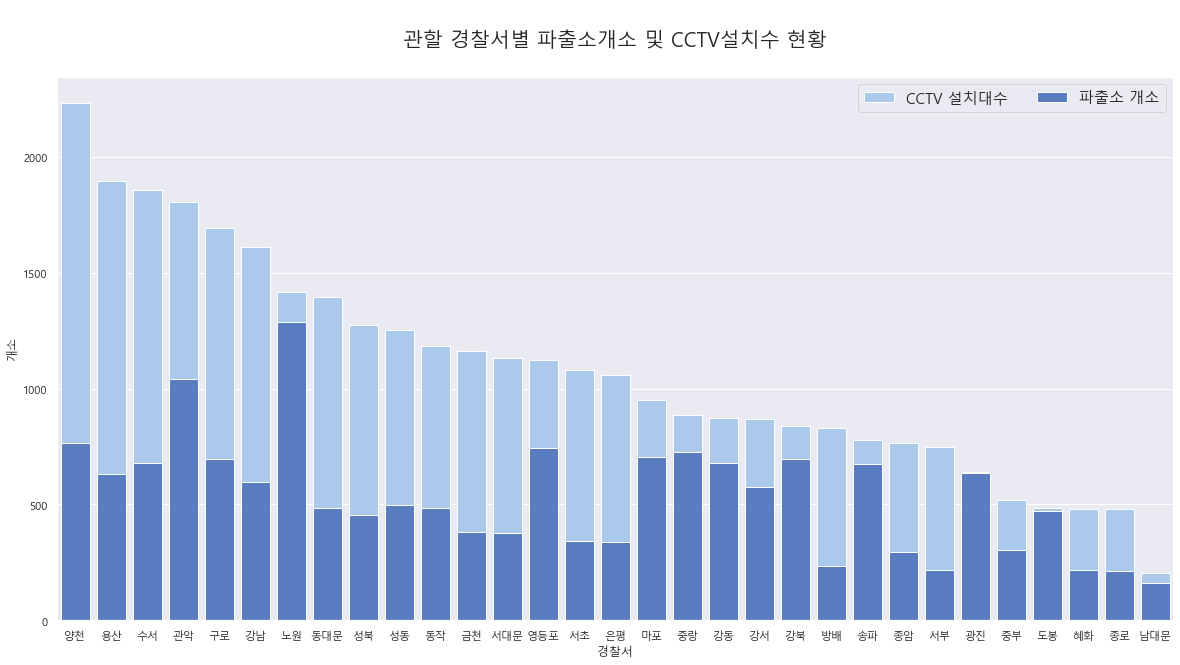

In [9]:
plt.figure(figsize=(20,10))

sns.set_color_codes("pastel")
sns.barplot(x=df_sort.index, y=df_sort['대수'], color="b", label='CCTV 설치대수')

sns.set_color_codes("muted")
sns.barplot(x=df_sort.index, y=df_sort['개소'], color="b", label='파출소 개소')

plt.legend(ncol=2, loc=1, fontsize=15, frameon=True)
plt.title('\n 관할 경찰서별 파출소개소 및 CCTV설치수 현황 \n', fontsize=20)

plt.show()

#alpha써도 되지만, 여기에서는 그냥 큰거 먼저 뿌려주고 그 위에 덧붙임 -

#### # seaborn.barplot style : x, y 값을 바꾸면, barh

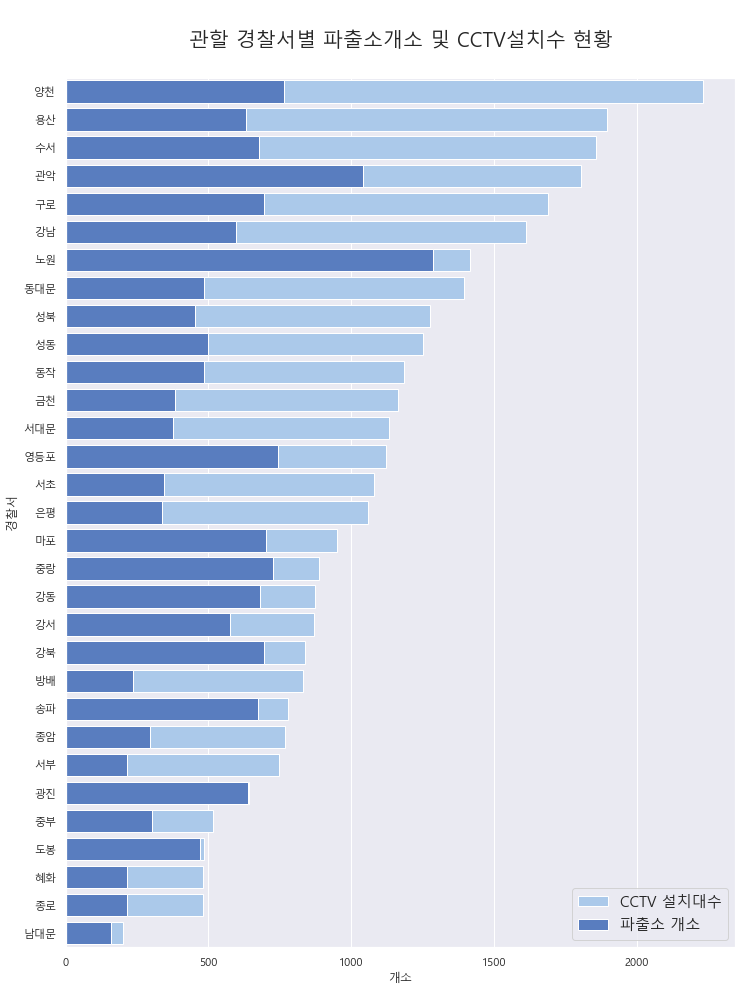

In [10]:
plt.figure(figsize=(12,16))

sns.set_color_codes("pastel")
sns.barplot(x=df_sort['대수'], y=df_sort.index, color="b", label='CCTV 설치대수')

sns.set_color_codes("muted")
sns.barplot(x=df_sort['개소'], y=df_sort.index, color="b", label='파출소 개소')

plt.legend(ncol=1, loc=4, fontsize=15, frameon=True)
plt.title('\n 관할 경찰서별 파출소개소 및 CCTV설치수 현황 \n', fontsize=20)

plt.show()

In [11]:
df_sort.head(10)

,개소,대수
경찰서,,
양천,763,2234
용산,632,1897
수서,677,1856
관악,1042,1804
구로,695,1691
강남,596,1612
노원,1288,1416
동대문,486,1396
성북,453,1276


#### # pyplot.pie style

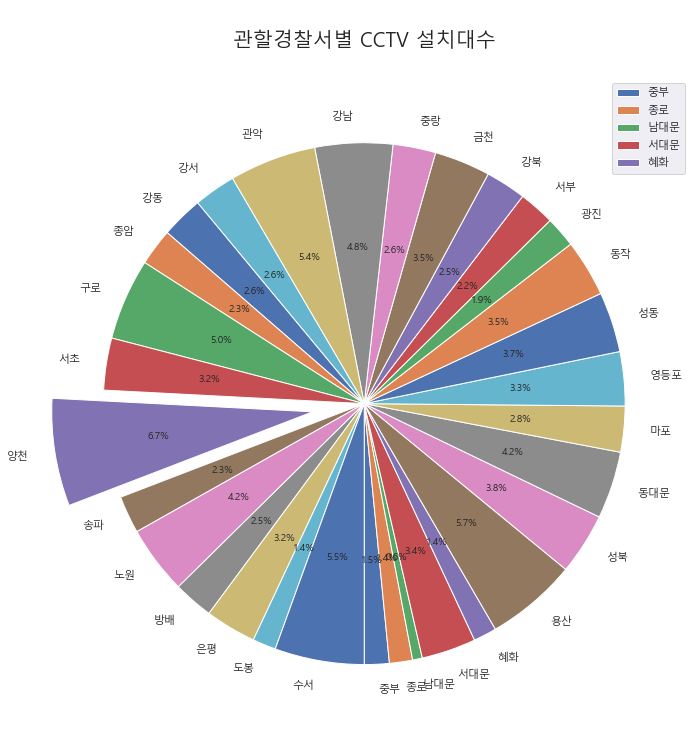

In [12]:
plt.figure(figsize=(12,12))

df_cctv = df['대수']
explode = [ 0.2 if df_cctv[i]==df_cctv.max() else 0 for i in range(len(df_cctv)) ]

plt.pie(df_cctv, 
        explode = explode,
        labels  = df_cctv.index,
        autopct = '%.1f%%', 
        shadow  = False, 
        startangle = 270
       )
plt.legend(df_cctv.index[:5], loc=1)
plt.title("\n관할경찰서별 CCTV 설치대수\n", fontsize=20)

plt.show()

#### # pandas.plot style : kind=pie, CCTV설치대수

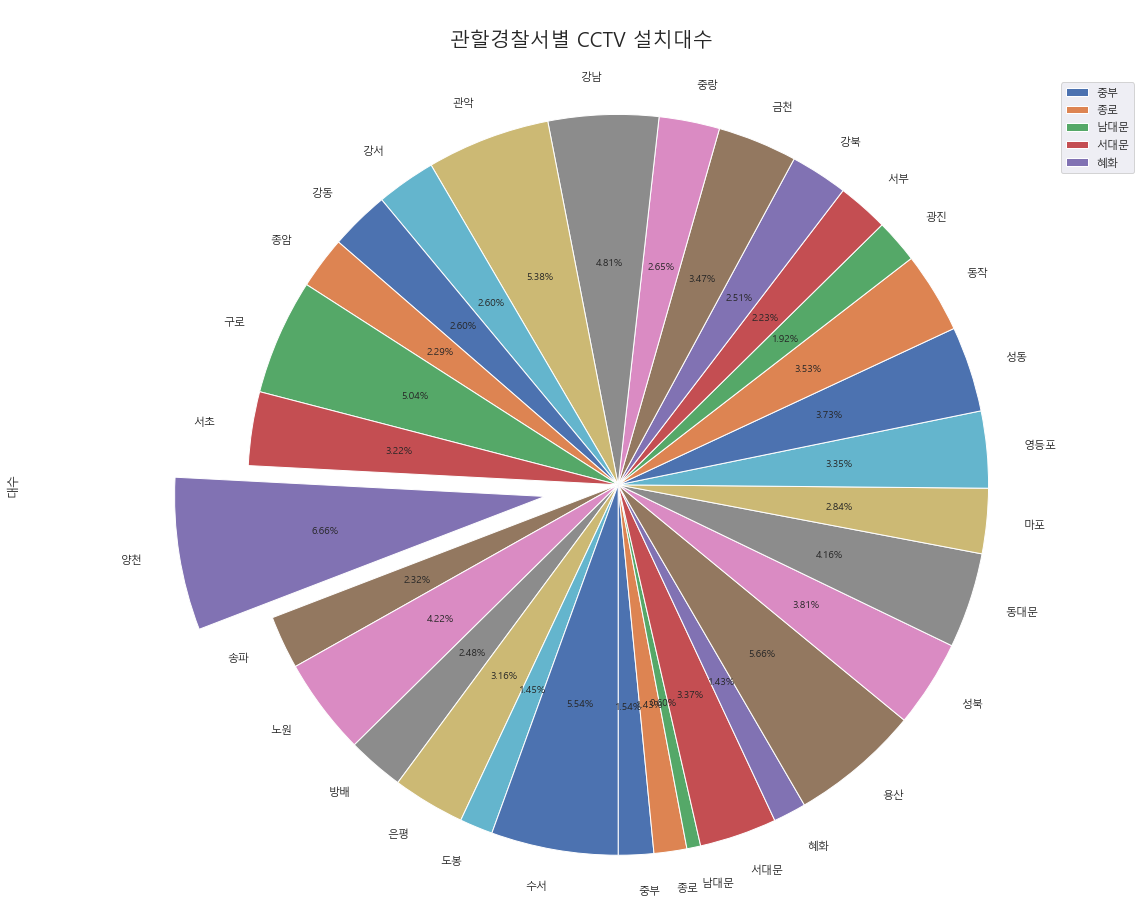

In [13]:
df_cctv = df['대수']
explode = [ 0.2 if df_cctv[i]==df_cctv.max() else 0 for i in range(len(df_cctv)) ]

df_cctv.plot(kind='pie', 
             figsize=(20, 15), 
             autopct='%.2f%%', 
             shadow=False, 
             startangle=-90,
             explode = explode,
            )
plt.axis('equal')
plt.legend(df_cctv.index[:5], loc=1)
plt.title("\n관할경찰서별 CCTV 설치대수\n", fontsize=20)

plt.show()

#### # pandas.plot style : kind=pie, 파출소 개소수

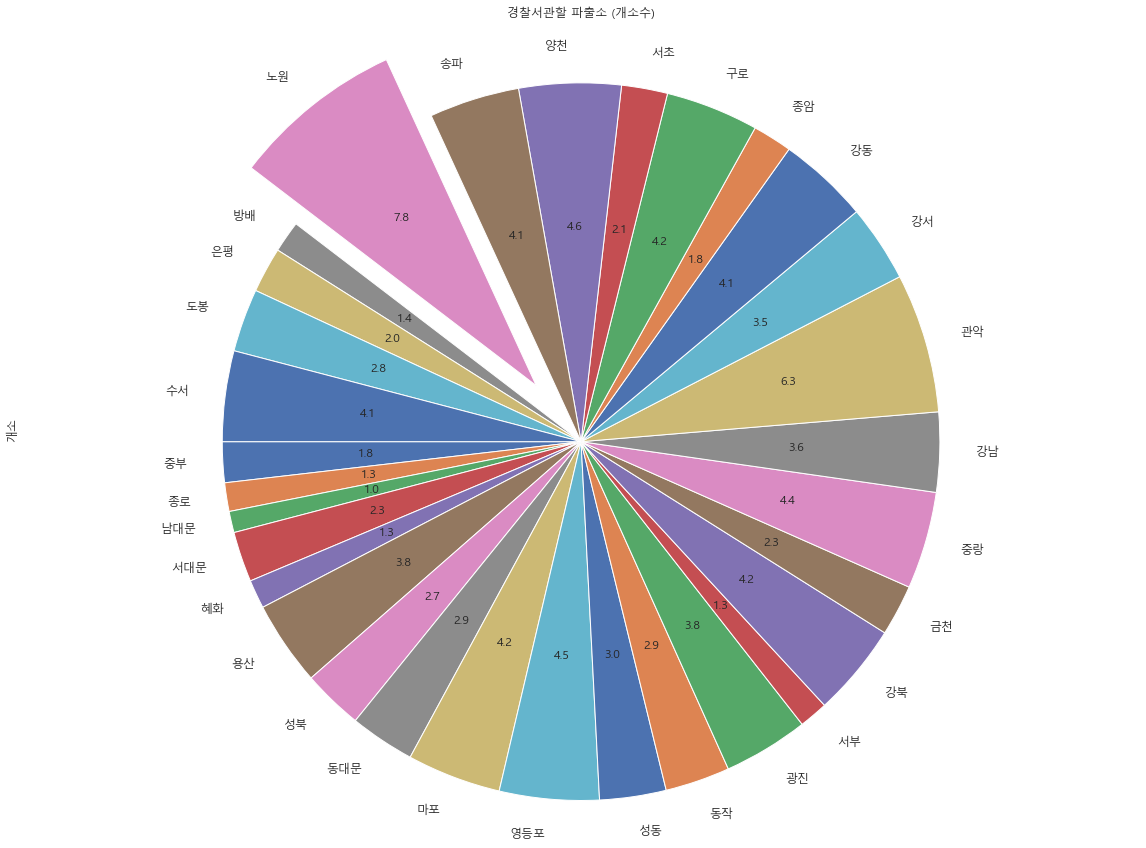

In [14]:
df_pbox = df['개소']
explode = [ 0.2 if df_pbox[i]==df_pbox.max() else 0 for i in range(len(df_pbox)) ]

df_pbox.plot(kind='pie', 
             title='경찰서관할 파출소 (개소수)',
             figsize=(20, 15), 
             fontsize=12, 
             autopct='%1.1f', 
             shadow=False, 
             startangle=180,
             explode = explode,
            )
plt.axis('equal')
plt.show()

#### # pyplog.subplot : 1page report

In [15]:
def draw_barplot(param='v'):
    
    if param == 'h':        
        sns.set_color_codes("pastel")
        sns.barplot(x = df_sort['대수'], y = df_sort.index, color="b", label='CCTV 설치대수')

        sns.set_color_codes("muted")
        sns.barplot(x = df_sort['개소'], y = df_sort.index, color="b", label='파출소 개소')

        plt.legend(ncol=2, loc=4, frameon=True, fontsize=15)
    
    else:
        sns.set_color_codes("pastel")
        sns.barplot(x = df_sort.index, y = df_sort['대수'], color="b", label='CCTV 설치대수')

        sns.set_color_codes("muted")
        sns.barplot(x = df_sort.index, y = df_sort['개소'], color="b", label='파출소 개소')

        plt.legend(ncol=2, loc=1, frameon=True, fontsize=15)
        
    
    
def draw_pieplot(param):
    if param == 'CCTV':
        df_cctv = df['대수']
        explode = [ 0.2 if df_cctv[i]==df_cctv.max() else 0 for i in range(len(df_cctv)) ]

        df_cctv.plot(kind='pie', 
                     title='경찰서관할 CCTV (설치대수)',
                     fontsize=9, 
                     autopct='%.2f%%', 
                     shadow=False, 
                     startangle=-90,
                     explode = explode,
                    )
        # plt.axis('equal')
        # plt.show()
    elif param == 'PBOX':
        df_pbox = df['개소']
        explode = [ 0.2 if df_pbox[i]==df_pbox.max() else 0 for i in range(len(df_pbox)) ]

        df_pbox.plot(kind='pie', 
                     title='경찰서관할 파출소 (개소수)',
                     fontsize=12, 
                     autopct='%1.1f', 
                     shadow=False, 
                     startangle=180,
                     explode = explode,
                    )
    else :
        print("Not Operation !!")
        return 
    
    plt.axis('equal')
    # plt.show()

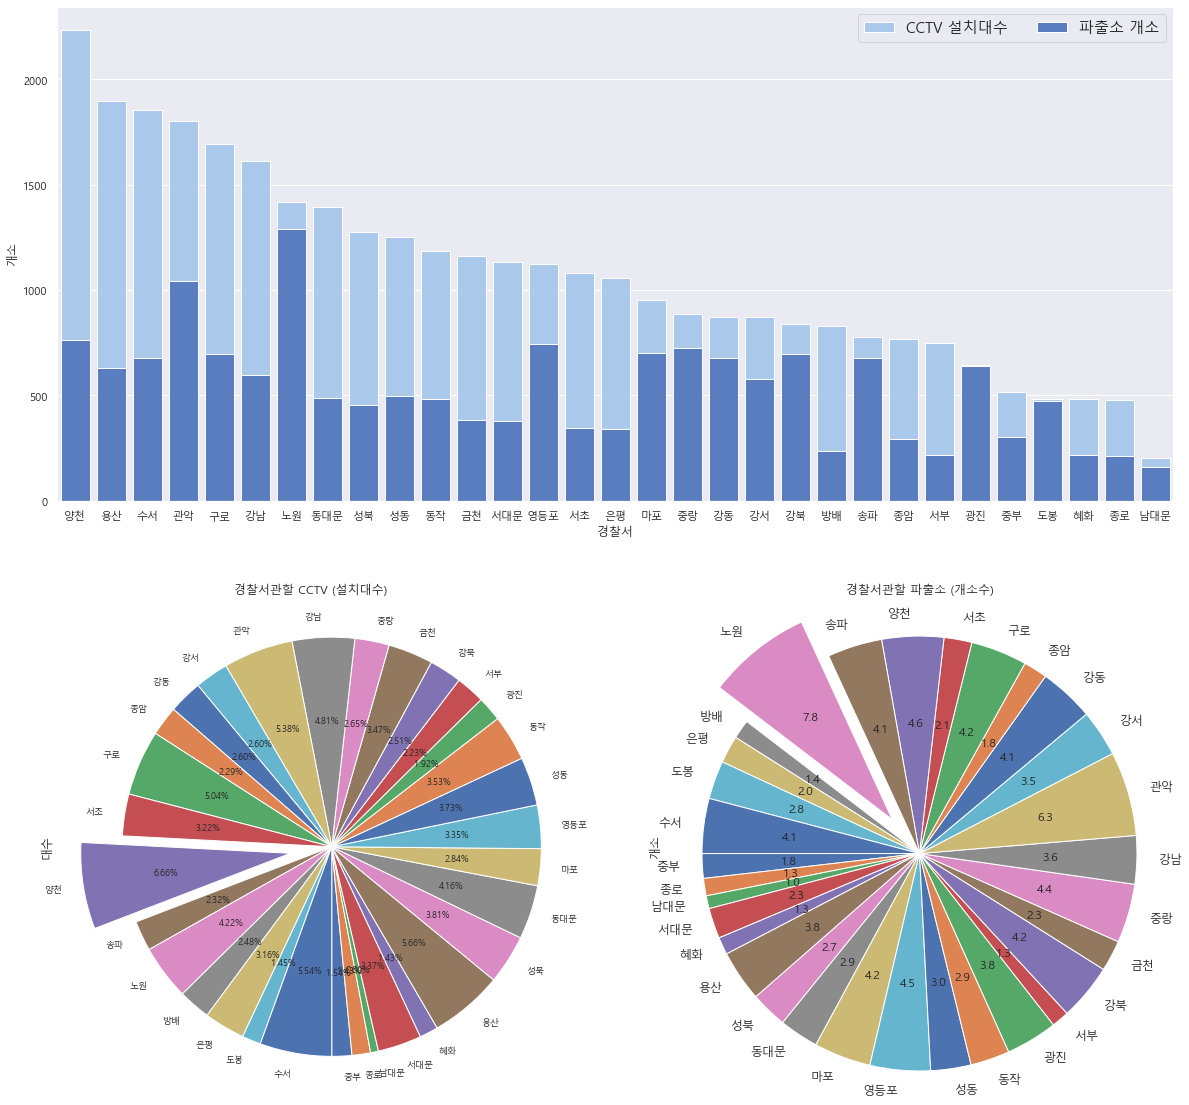

In [16]:
plt.figure(figsize=(20,20))

plt.subplot(211) 
draw_barplot(param='v')

plt.subplot(223) 
draw_pieplot('CCTV')

plt.subplot(224)
draw_pieplot('PBOX')

plt.show()